# EDA for House Price Prediction


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load the data
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

# Display basic information about the dataset
print(train_df.info())
train_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0
1,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0
2,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0
3,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0


## Handle Missing Values

In [23]:
# Dropping unnecessary columns
columns_to_drop = ['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature']
train_df = train_df.drop(columns=columns_to_drop)
test_df = test_df.drop(columns=columns_to_drop)


In [25]:
# Separate the target variable 'SalePrice' from train_df
y = train_df['SalePrice']
X_train = train_df.drop('SalePrice', axis=1)

In [27]:
# Explore missing values in both datasets
print("Missing values in train_df:")
print(X_train.isnull().sum().sort_values(ascending=False).head(20))

print("Missing values in test_df:")
print(test_df.isnull().sum().sort_values(ascending=False).head(20))

Missing values in train_df:
MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
Electrical        1
Functional        0
KitchenAbvGr      0
BedroomAbvGr      0
HalfBath          0
FullBath          0
dtype: int64
Missing values in test_df:
MasVnrType      894
FireplaceQu     730
LotFrontage     227
GarageFinish     78
GarageCond       78
GarageYrBlt      78
GarageQual       78
GarageType       76
BsmtCond         45
BsmtExposure     44
BsmtQual         44
BsmtFinType1     42
BsmtFinType2     42
MasVnrArea       15
MSZoning          4
BsmtHalfBath      2
Functional        2
BsmtFullBath      2
Utilities         2
GarageCars        1
dtype: int64


In [29]:
# Separate numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns

In [31]:
# Impute missing values for numeric columns using mean strategy
numeric_imputer = SimpleImputer(strategy='mean')
X_train[numeric_cols] = numeric_imputer.fit_transform(X_train[numeric_cols])

In [33]:
# Ensure 'SalePrice' is not in the test dataset before transformation
if 'SalePrice' in test_df.columns:
    test_df = test_df.drop('SalePrice', axis=1)

In [35]:
# Apply numeric imputer to the test set
test_df[numeric_cols] = numeric_imputer.transform(test_df[numeric_cols])

In [37]:
# Impute missing values for categorical columns using the most frequent strategy
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
test_df[categorical_cols] = categorical_imputer.transform(test_df[categorical_cols])


## Encoding Categorical Variables

In [47]:
# One-hot encode categorical variables for both train and test data
X_train = pd.get_dummies(X_train, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

In [49]:
# Align the train and test sets so they have the same columns
X_train, test_df = X_train.align(test_df, join='left', axis=1)

In [51]:
# Fill missing columns in test set with zeros (since some columns may be missing in test after one-hot encoding)
test_df = test_df.fillna(0)

## Distribution of the target variable 'SalePrice'


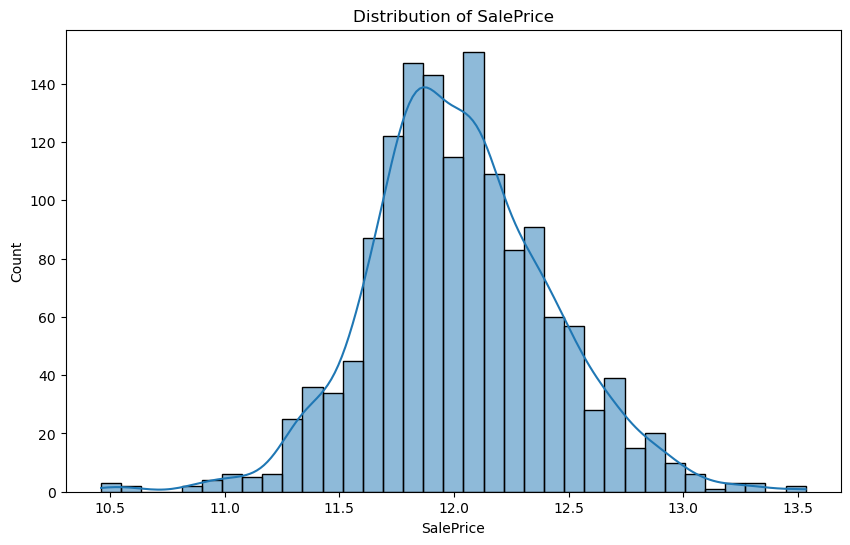

In [53]:
# Plot the distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of SalePrice')
plt.show()

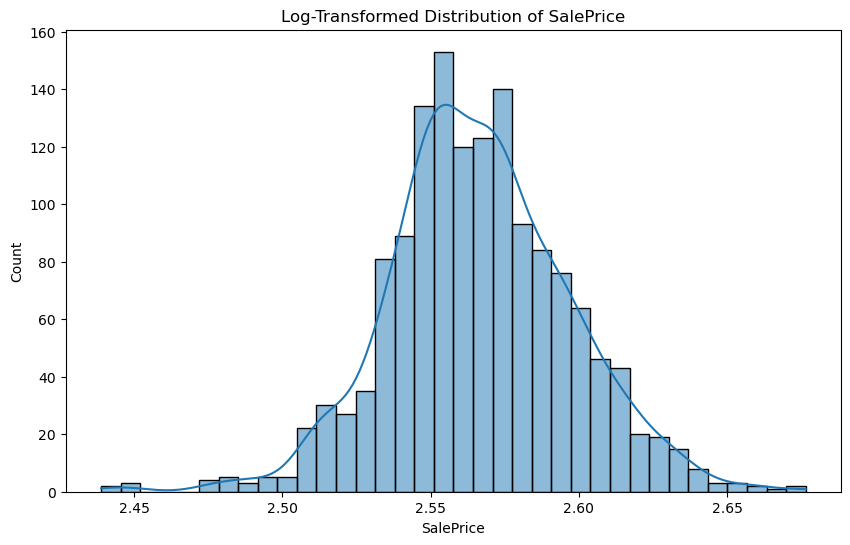

In [55]:
# Apply log transformation to normalize SalePrice
y = np.log1p(y)
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('Log-Transformed Distribution of SalePrice')
plt.show()

## Correlation Matrix and Feature Relationships


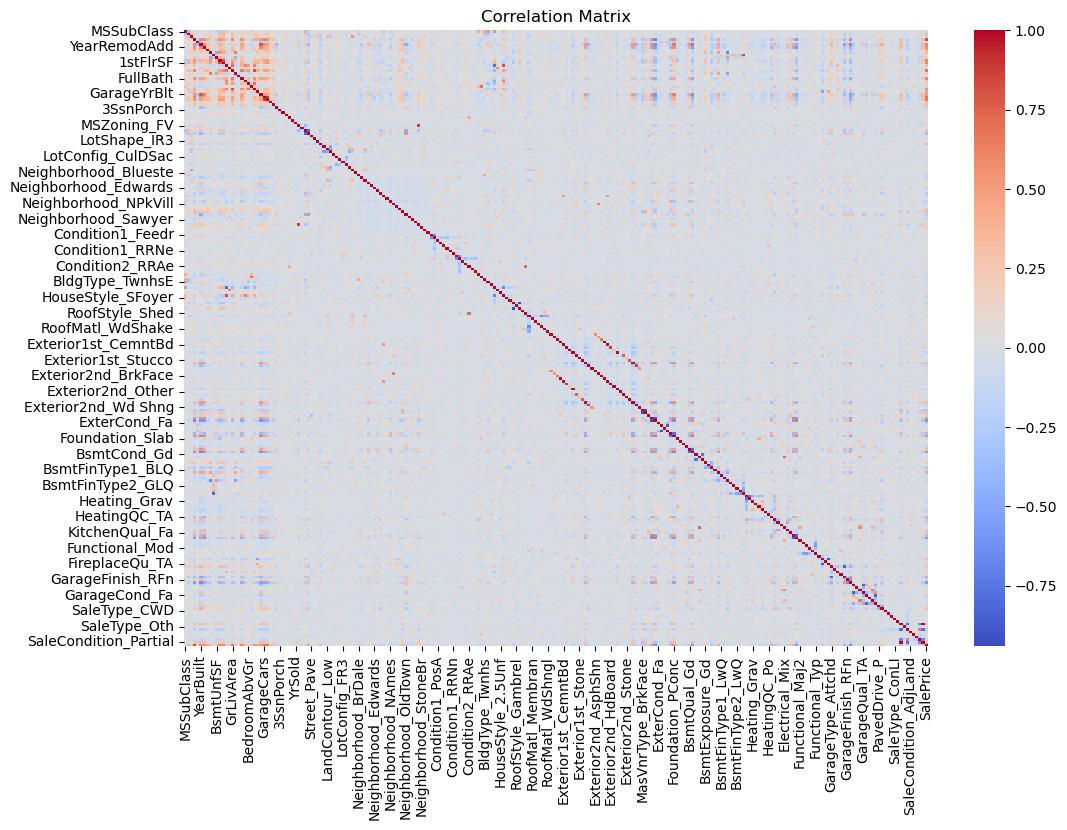

In [57]:
corr_matrix = pd.concat([X_train, pd.DataFrame(y, columns=['SalePrice'])], axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [59]:
# Display top correlated features with SalePrice
corr_with_target = corr_matrix['SalePrice'].sort_values(ascending=False)
print("Top correlated features with SalePrice:\n", corr_with_target.head(10))

Top correlated features with SalePrice:
 SalePrice       1.000000
OverallQual     0.815005
GrLivArea       0.697001
GarageCars      0.680156
GarageArea      0.649601
TotalBsmtSF     0.609138
FullBath        0.593950
1stFlrSF        0.593533
YearBuilt       0.587947
YearRemodAdd    0.566811
Name: SalePrice, dtype: float64


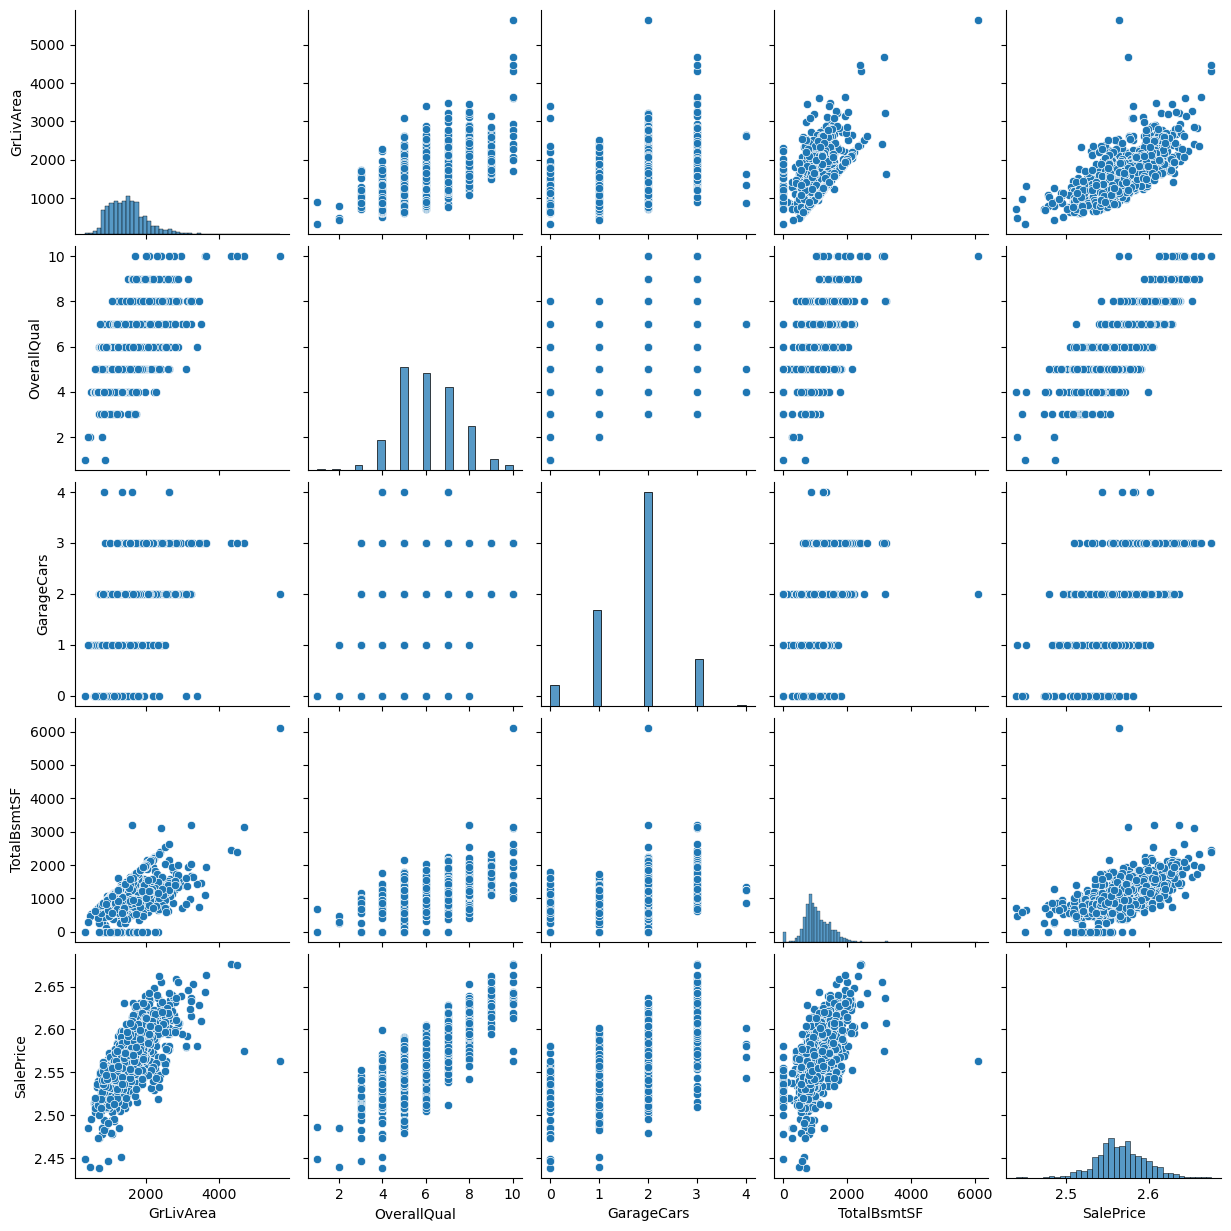

In [61]:
# Pairplot to visualize relationships between important features and SalePrice
important_features = ['GrLivArea', 'OverallQual', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(pd.concat([X_train[important_features], pd.DataFrame(y, columns=['SalePrice'])], axis=1))
plt.show()


## Outlier Detection in GrLivArea


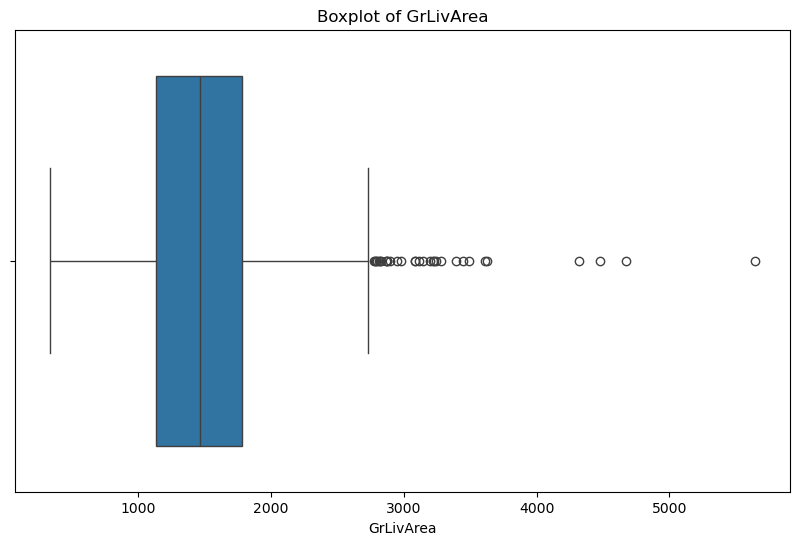

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['GrLivArea'])
plt.title('Boxplot of GrLivArea')
plt.show()


In [65]:
# Remove extreme outliers in GrLivArea (e.g., houses with GrLivArea > 4000)
X_train = X_train[X_train['GrLivArea'] < 4000]

## Save Cleaned Data for Model Training

In [70]:
# Add the target variable back to the cleaned training data
X_train['SalePrice'] = y

In [74]:
# Save the cleaned data
X_train.to_csv('../data/train_cleaned.csv', index=False)
test_df.to_csv('../data/test_cleaned.csv', index=False)

print("Cleaned datasets saved successfully!")

Cleaned datasets saved successfully!
